In [69]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
import nltk
from nltk.tokenize import word_tokenize

import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

### I have going to cover following step
1. Clean Then text
2. Apply One hot encoding
3. Apply pad sequence
4. Build RNN model
5. compail model
6. Train the RNN model

In [70]:
# load dataset
df = pd.read_csv("../../../dataset/Restaurant reviews.csv")
df

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4


In [71]:
# chek null value
df.isnull().sum()

Review    45
Rating    38
dtype: int64

In [72]:
df.shape

(10000, 2)

In [73]:
df.dropna(inplace=True)

In [74]:
df.shape

(9955, 2)

In [75]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [76]:
df['Rating'].value_counts()

Rating
5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [77]:
# remove Like
df[df['Rating'] == "Like"].index

Index([7601], dtype='int64')

In [78]:
df.drop(index=df[df['Rating'] == "Like"].index, inplace=True)

In [79]:
df

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4


In [80]:
# all rating into flot
df['Rating'] = df['Rating'].apply(float)

In [81]:
# Create target variable
# 1 = Positive, 0 = Negative Review
df['Target'] = df['Rating'].apply(lambda x: 1 if x > 3.0 else 0)

In [82]:
df.head()

,Review,Rating,Target
0,"The ambience was good, food was quite good . h...",5.0,1
1,Ambience is too good for a pleasant evening. S...,5.0,1
2,A must try.. great food great ambience. Thnx f...,5.0,1
3,Soumen das and Arun was a great guy. Only beca...,5.0,1
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,1


In [83]:
df.drop(columns=['Rating'], inplace=True)

In [84]:
df.head()

,Review,Target
0,"The ambience was good, food was quite good . h...",1
1,Ambience is too good for a pleasant evening. S...,1
2,A must try.. great food great ambience. Thnx f...,1
3,Soumen das and Arun was a great guy. Only beca...,1
4,Food is good.we ordered Kodi drumsticks and ba...,1


In [ ]:

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words("english"))
important_words = {"not", "no", "nor", "never"}
final_stopwords = stop_words - important_words

lemmatize = WordNetLemmatizer()

# Clean the text
corpus = []
for i in range(0, len(df)):
    reviews = re.sub('[^a-zA-Z]', ' ', df['Review'].iloc[i])
    reviews = reviews.lower()
    reviews = word_tokenize(reviews, language="english")
    reviews = [lemmatize.lemmatize(word) for word in reviews if word not in final_stopwords]
    reviews = " ".join(reviews).strip()
    corpus.append(reviews)


In [19]:
corpus

['ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful',
 'ambience good pleasant evening service prompt food good good experience soumen da kudos service',
 'must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing',
 'soumen da arun great guy behavior sincerety good food course would like visit place',
 'food good ordered kodi drumstick basket mutton biryani good thanks pradeep served well enjoyed ambience also good',
 'ambiance good service good food apradeecp subro best service food good papiya good hostess ur caption good star restaurant',
 'nice place ambience different food ordered tasty service also gud worth visit reasonable well really must visit place',
 'well reading many review finally visited place ambience good coming food crispy corn nice tawa fish ok basket biryani disappointed u biryani ok

In [20]:
# define vocabulary size
voc_size = 10000
one_hot_repre = [one_hot(word, voc_size) for word in corpus]

In [21]:
# Create X and y
X = one_hot_repre
y = df['Target']

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
len(X_train)

7963

In [23]:
# apply pad sequence
max_length=500
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
X_train

array([[   0,    0,    0, ..., 5312, 8210, 6237],
       [   0,    0,    0, ..., 3477, 8092, 1519],
       [   0,    0,    0, ..., 7064, 9792, 4127],
       ...,
       [   0,    0,    0, ...,  656, 8019, 8258],
       [   0,    0,    0, ..., 4114, 2921, 3738],
       [   0,    0,    0, ..., 7866, 9528, 8821]])

In [24]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [25]:
# Build RNN model
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=128, input_length=max_length))
model.add(SimpleRNN(128, activation="relu", return_sequences=True))
model.add(SimpleRNN(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 128)          32896     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1325313 (5.06 MB)
Trainable params: 1325313 (5.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [28]:
# Setup EarlyStopping
earlystoping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [29]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=[X_test, y_test],
    callbacks=[earlystoping]
)

Epoch 1/100


125/125 [==============================] - 27s 186ms/step - loss: 0.4428 - accuracy: 0.7724 - val_loss: 0.2966 - val_accuracy: 0.8895
Epoch 2/100
125/125 [==============================] - 23s 181ms/step - loss: 0.2218 - accuracy: 0.9132 - val_loss: 0.3370 - val_accuracy: 0.8845
Epoch 3/100
125/125 [==============================] - 23s 182ms/step - loss: 0.1583 - accuracy: 0.9398 - val_loss: 0.3734 - val_accuracy: 0.8634
Epoch 4/100
125/125 [==============================] - 24s 193ms/step - loss: 0.1184 - accuracy: 0.9579 - val_loss: 0.4129 - val_accuracy: 0.8609
Epoch 5/100
125/125 [==============================] - 25s 204ms/step - loss: 0.0942 - accuracy: 0.9679 - val_loss: 0.4887 - val_accuracy: 0.8649
Epoch 6/100
125/125 [==============================] - 27s 215ms/step - loss: 0.0660 - accuracy: 0.9775 - val_loss: 0.5842 - val_accuracy: 0.8679
Epoch 7/100
125/125 [==============================] - 27s 218ms/step - loss: 0.1021 - accuracy: 0.9640 - val_loss: 0.5003

In [30]:
# save model
model.save("simple_rnn.h5")

d:\machine-learning\deep-learning-project\Restaurant-Reviews-RNN-Problem\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test)

63/63 [==============================] - 2s 37ms/step - loss: 0.2966 - accuracy: 0.8895


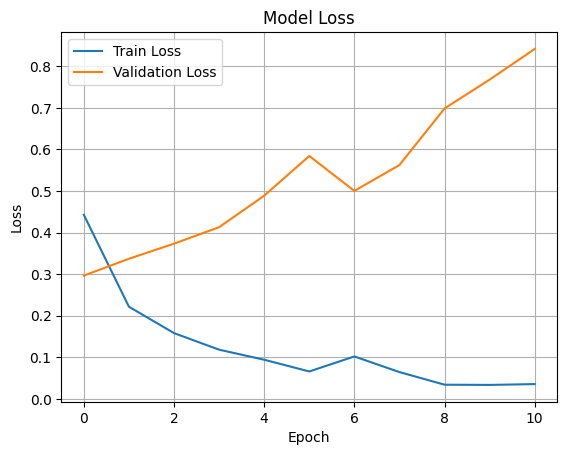

In [32]:
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

## Prediction for new data

In [33]:
# load model
from tensorflow.keras.models import load_model

model = load_model('simple_rnn.h5')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 128)          32896     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1325313 (5.06 MB)
Trainable params: 1325313 (5.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.get_weights()

[array([[ 0.02760597, -0.02141372, -0.02409746, ..., -0.0045886 ,
          0.03014342,  0.05388894],
        [-0.03510682,  0.01875623,  0.05925215, ...,  0.03228152,
         -0.01654749,  0.04335217],
        [ 0.01212951,  0.00809433,  0.00425102, ...,  0.01089358,
          0.03735385, -0.0426661 ],
        ...,
        [-0.03703769,  0.01521172,  0.00820312, ..., -0.05259792,
         -0.01984052,  0.05414135],
        [ 0.01205773, -0.00588985,  0.0301948 , ..., -0.02826852,
         -0.03340276,  0.02311799],
        [ 0.02656941, -0.01834026,  0.02475349, ..., -0.02472393,
         -0.03131919, -0.0528179 ]], dtype=float32),
 array([[ 0.10163821,  0.04192028,  0.11890757, ..., -0.13846439,
         -0.12151275, -0.12297218],
        [ 0.00709529, -0.11130706,  0.06073222, ...,  0.06178389,
         -0.00481884,  0.00400423],
        [ 0.10112409,  0.10612392, -0.07931726, ...,  0.02477706,
          0.05925771, -0.00875424],
        ...,
        [ 0.1306751 ,  0.0371039 ,  0.0

In [45]:

# Function to preprocess user input
def preprocess_text(text):
    reviews = re.sub('[^a-zA-Z]', ' ', text)
    reviews = reviews.lower() 
    reviews = word_tokenize(reviews, language="english")
    reviews = [lemmatize.lemmatize(word) for word in reviews if word not in final_stopwords]
    preprocess_text = " ".join(reviews).strip()
    encoded_review = one_hot(preprocess_text, voc_size)
    padded_review = pad_sequences([encoded_review], maxlen=max_length)
    return padded_review


In [61]:
def predict_sentiment(review):
    processes_input = preprocess_text(review)
    prediction = model.predict(processes_input)
    sentiment = 'Positive' if prediction[0][0] > 0.6 else 'Negative'
    return sentiment, prediction[0][0]

In [68]:
example_review = "Very disappointed with our visit. The staff seemed uninterested, and the food arrived cold. Definitely not what we expected."
sentiment, score = predict_sentiment(example_review)

print("Review Text: ", example_review)
print("Sentiment: ", sentiment)
print("Score: ", score)

1/1 [==============================] - 0s 38ms/step
Review Text:  Very disappointed with our visit. The staff seemed uninterested, and the food arrived cold. Definitely not what we expected.
Sentiment:  Negative
Score:  0.015973093
